## Polynomial Regression

In polynomial regressions features can have interaction with eachother, we need to check for this interaction, we can multiply the features together or add an interaction term, luckliy scikit-learn does all of this <br> 
Through a preprocesing call

PolynomialFeatures - creates higher order features and does the combination automaticaly

The more we raise log to an increasing power the more linear it starts to become, thus we can find some beta coefficients

Generalized Terms for Two Features A and B : <br>
1, A , B , A^2 , AB , B^2 <br>
1, x1, x2, x1^2, x1x2, x2^2

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv('notebook/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# we need to sepperate the features from the label
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [4]:
y = df['sales']

In [5]:
# now preprocesing
from sklearn.preprocessing import PolynomialFeatures

In [6]:
polynomial_converter = PolynomialFeatures(degree=2, interaction_only= False,include_bias=False)
# interaction_only = False by default meaning that it will show the degress
# We dont need the bias termp, True by default since we run a linear regression

In [7]:
polynomial_converter.fit(X) # the data

PolynomialFeatures(include_bias=False)

In [11]:
poly_features = polynomial_converter.transform(X) # will transform x to a second degree
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [12]:
polynomial_converter.transform(X).shape
# 200 rows as expected
# 9 columns since we have 3 columns and their interaction

(200, 9)

In [13]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [15]:
poly_features[0].reshape(3,3) # e+02 means 10 ^ 2
# the first term is 230.1 the original X, the additional terms are interactional terms


array([[2.301000e+02, 3.780000e+01, 6.920000e+01],
       [5.294601e+04, 8.697780e+03, 1.592292e+04],
       [1.428840e+03, 2.615760e+03, 4.788640e+03]])

In [16]:
2.301000e+02 * 3.780000e+01 # this is equal the the 2,2 element which shows the interaction between the elements

8697.779999999999

In [17]:
2.301000e+02 * 6.920000e+01 # this is the 2,3 element which is the interaction of the first with the 3rd

15922.92

In [18]:
3.780000e+01 * 6.920000e+01 # the interaction of radio and newspaper

2615.7599999999998

In [19]:
# the squared terms 
2.301000e+02 ** 2 # this is the squared term, 1,3

52946.009999999995

In [20]:
# squared term for radio
3.780000e+01 ** 2

1428.8399999999997

The feature order isnt exact, always the 3 original features are first. We train and do the split on our new features

In general we need to
* we fit the data first
* than transform it <br>
There is a fit transform method to do them both 

In [22]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

# Training and evaluating the model

In [23]:
# rememberr the regression model is gonna be trained on the 9 features and we need to save the model to accomodate the neccessary new datapoints
from sklearn.model_selection import train_test_split

In [24]:
poly_features = polynomial_converter.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y , test_size=0.3, random_state = 101)

In [26]:
# now we import the linear model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [27]:
model.fit(X_train, y_train) # we fit the model like before
                            # we train the model on 9 feautres

LinearRegression()

In [30]:
test_predictions = model.predict(X_test)
test_predictions.shape

(60,)

In [32]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE # These errors are smaller than before

0.4896798044803838

In [36]:
MSE = mean_squared_error(y_test, test_predictions)
MSE

0.4417505510403753

In [38]:
RMSE = np.sqrt(MSE)
RMSE # this will punish the model since the points are far off

0.6646431757269274

In [42]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [39]:
# now we need to extract the coeff this is a bit hard since they have no particular order so we need to deduct them from poly features
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [41]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [43]:
# in this case the last coefficient which is -3 * 10^ -5 , this is a really weak coefficient, should be one of the squared features
69.2 ** 2 # the newspaper feature isnt considered impacting in the model

4788.64

In [ ]:
# there are really strong interaction terms in the beta coeff, the ones with positive power

# Adjusting the model parameters for better results

Deciding which degrees are the best

Overfitting and Underfitting

A higher oreder polynomial model performs better than a linear regression, how do we choose the correct degree. Increasing the level complexy will lead to bias vs variance tradeoff
High Bias - Underfitting
High Variance - Overfitting - reacts too much to the noise

Overfitting - model fits too much to the noise from the data, low error on training sets , high error on test/validation sets <br>
![](https://media.discordapp.net/attachments/714877156785913888/1014107593318334544/unknown.png)<br>
This model picks up too much noise <br>
This model will have an error of 0 and would lead you to belive you had a good model, IT WONT PREDICT WELL IN TESTS since it will overfit


Underfitting - too much bias <br>
model doesnt capture it right, the model will be too simple like a linear fit, it will perform well for certain test but will perform bad in train and test dataset <br>
Underfitting generalizes too much of the data

Overfitting can be harder to detect than Underfitting since overfitting performs well in training but not in testing while underfitting performs bad in both especially for further points

# Model Complexity means the degree of the polynomial in this case

We need to plot the variance to detect these errors <br>
![](https://cdn.discordapp.com/attachments/714877156785913888/1014109094250024990/unknown.png) <br> 
This above is the ideal model complexity and error scaling

# We need to plot the error and model complexity

If the error goes down with increasing the model complexity we will have a good model <br>
![](https://media.discordapp.net/attachments/714877156785913888/1014109794514243594/unknown.png) <br> <br>
Ideally the train model will perform better since it is data that the model has seen before

In most cases we will pick a specific point where the error for the test set will start to increase marginaly <br>
![](https://cdn.discordapp.com/attachments/714877156785913888/1014110193358995557/unknown.png)

# Adjusting Model Parameters for polynomial regression

We can create multiple model with different degrees using a for loop 

* Create different order poly
* split poly feat train/test
* fit on train
* store/save the rmse for both the train and test
* PLOT the results (error vs poly order)

In [44]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converte = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_converte.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y ,test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # we run predictions on X_train, y_train
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [45]:
train_rmse_errors # the error goes down down , but we have a spike on the 7th run but it drops down again.
# this indicates overfitting after that spike, this will be indicated on the test error as seen below

[1.734594124329376,
 0.5879574085292232,
 0.43393443569020673,
 0.35170836883993495,
 0.2509342964085938,
 0.1936779797589679,
 5.421761789752393,
 0.141458755475498,
 0.17167956590345093]

In [46]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269274,
 0.5803286825236476,
 0.5077742639859423,
 2.5758223594965197,
 4.2964835485383555,
 1379.031549052847,
 4408.913914672059,
 94070.56981071175]

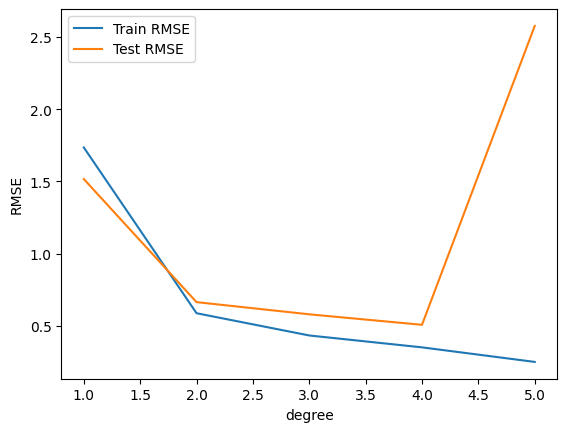

In [50]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'Train RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'Test RMSE')
plt.ylabel('RMSE')
plt.xlabel('degree')
plt.legend() # this will print the training error

The spike happens around the 4th degree. In general the 4th power doesnt benefit us that much so we should usually choose a 2nd or 3rd degree polynomial since the 4th is in the risk of exploding error.

# Model Saving and Deployment

We need to save our features and the model itself

In [51]:
final_poly_convertor = PolynomialFeatures(degree=3, include_bias=False)
final_model = LinearRegression()

In [52]:
full_converted_x = final_poly_convertor.fit_transform(X)

final_model.fit(full_converted_x, y)


LinearRegression()

In [53]:
# now we save the convertedr and the final fitted model
from joblib import dump, load 
dump(final_model, 'final_poly_model.joblib') # save the model
dump(final_poly_convertor, 'final_convertor.joblib') # save the converter

['final_convertor.joblib']

In [54]:
# now load the files
loaded_converter = load('final_convertor.joblib')

In [55]:
loaded_model = load('final_poly_model.joblib')

In [56]:
# new adv campaing
campaign = [[149,22,12]]

transformed_data = loaded_converter.fit_transform(campaign)

In [57]:
loaded_model.predict(transformed_data)

array([14.64501014])